In [133]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [134]:
import sys
print(sys.path)

['/Users/laibohan/Desktop/Gatech/Visualization', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python38.zip', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/lib-dynload', '', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages', '/Users/laibohan/.pyenv/versions/anaconda3-5.0.1/envs/py38/lib/python3.8/site-packages/IPython/extensions', '/Users/laibohan/.ipython']


In [135]:
df = pd.read_csv("final_agg.csv")
df.head()

,Unnamed: 0,state,period_begin,total_homes_sold,total_value,AVG_median_sales_price
0,0,AK,2017-01-02,81.0,21202000.0,261753.086420
1,1,AK,2017-01-09,95.0,28384895.0,298788.368421
2,2,AK,2017-01-16,86.0,22529900.0,261975.581395
3,3,AK,2017-01-23,105.0,26613000.0,253457.142857
4,4,AK,2017-01-30,116.0,32739500.0,282237.068966


In [136]:
def create_each_state(state,split_date = "2020-03-01",vali_date = "2019-08-05" ):
    agg = df[df["state"]==state]
    split_date = split_date
    vali_date = vali_date
    test = agg[agg.period_begin >=split_date]
    train = agg[agg.period_begin < vali_date]
    val = agg[(agg.period_begin >=vali_date)&(agg.period_begin<split_date)]
    return train, val, test
train,val,test = create_each_state("NY")

print(train.shape)
print(val.shape)
print(test.shape)

(135, 6)
(30, 6)
(33, 6)


In [137]:
def process_the_data(df,var):
    scaler = MinMaxScaler()
    train_v = df[var].values
    scaler = MinMaxScaler(feature_range=(-1, 1))
    train_v_normalized = scaler.fit_transform(train_v.reshape(-1, 1))
    train_v_normalized = torch.FloatTensor(train_v_normalized).view(-1)
    return scaler, train_v_normalized



Transform the data so the data is between -1 and 1

In [138]:
def create_inout_sequences(input_data, tw):
    seq = []
    l = len(input_data)
    for i in range(l-tw):
        t_seq = input_data[i:i+tw]
        t_label = input_data[i+tw:i+tw+1]
        seq.append((t_seq ,t_label))
    return seq

In [139]:
sca,input_data = process_the_data(train,var = "total_value")
input_data

tensor([-0.8890, -0.5772, -0.6827, -0.5480, -0.4019, -0.8393, -0.5888, -0.9355,
        -0.4644, -0.8009, -0.7514, -0.7262, -0.4893, -0.6450, -0.8262, -0.7113,
        -0.4956, -0.6273, -0.7082, -0.5720, -0.3633, -0.3297, -0.3894, -0.1663,
        -0.0377,  0.5454, -0.6733, -0.0455,  0.1246,  0.3068,  0.0868, -0.0188,
         0.1895,  0.0956,  0.4588, -0.4943, -0.2348, -0.2513,  0.0585, -0.2962,
        -0.5733, -0.4099, -0.1838, -0.1502, -0.5454, -0.2569, -0.7506, -0.1148,
        -0.4211, -0.1169, -0.0229, -0.5743, -1.0000, -0.5196, -0.7349, -0.5444,
        -0.2727, -0.7794, -0.6091, -0.9164, -0.5178, -0.7789, -0.6263, -0.7529,
        -0.4191, -0.8750, -0.5940, -0.5170, -0.4336, -0.3962, -0.5350, -0.4226,
        -0.4396, -0.2735, -0.3842, -0.1156,  0.0083,  0.6819, -0.5370,  0.0579,
         0.0777,  0.2769,  0.2994, -0.1158,  0.0393,  0.0248,  0.4187, -0.3987,
        -0.2111, -0.2377,  0.0059, -0.2324, -0.4920, -0.1708, -0.2253, -0.0476,
        -0.3229, -0.3324, -0.7485, -0.06

In [140]:
#input_data = process_the_data(train,var = "total_value")
train_window = 52
train_input_seq = create_inout_sequences(input_data, train_window)

In [141]:
train_input_seq

[(tensor([-0.8890, -0.5772, -0.6827, -0.5480, -0.4019, -0.8393, -0.5888, -0.9355,
          -0.4644, -0.8009, -0.7514, -0.7262, -0.4893, -0.6450, -0.8262, -0.7113,
          -0.4956, -0.6273, -0.7082, -0.5720, -0.3633, -0.3297, -0.3894, -0.1663,
          -0.0377,  0.5454, -0.6733, -0.0455,  0.1246,  0.3068,  0.0868, -0.0188,
           0.1895,  0.0956,  0.4588, -0.4943, -0.2348, -0.2513,  0.0585, -0.2962,
          -0.5733, -0.4099, -0.1838, -0.1502, -0.5454, -0.2569, -0.7506, -0.1148,
          -0.4211, -0.1169, -0.0229, -0.5743]),
  tensor([-1.])),
 (tensor([-0.5772, -0.6827, -0.5480, -0.4019, -0.8393, -0.5888, -0.9355, -0.4644,
          -0.8009, -0.7514, -0.7262, -0.4893, -0.6450, -0.8262, -0.7113, -0.4956,
          -0.6273, -0.7082, -0.5720, -0.3633, -0.3297, -0.3894, -0.1663, -0.0377,
           0.5454, -0.6733, -0.0455,  0.1246,  0.3068,  0.0868, -0.0188,  0.1895,
           0.0956,  0.4588, -0.4943, -0.2348, -0.2513,  0.0585, -0.2962, -0.5733,
          -0.4099, -0.1838, -0.1

In [142]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=200, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))
    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [143]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [144]:
model

LSTM(
  (lstm): LSTM(1, 200)
  (linear): Linear(in_features=200, out_features=1, bias=True)
)

In [145]:
epochs = 30

for i in range(epochs):
    for seq, labels in train_input_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.50986570
epoch:  26 loss: 0.09053852
epoch:  29 loss: 0.1309196502


In [146]:
fut_pred = 30

test_inputs = input_data[-train_window:].tolist()
print(test_inputs)

[-0.11575601249933243, 0.03926943987607956, 0.02477789856493473, 0.4187377691268921, -0.39870354533195496, -0.21113185584545135, -0.2377103567123413, 0.005891562905162573, -0.23241844773292542, -0.4920494854450226, -0.17081493139266968, -0.22525115311145782, -0.0476112999022007, -0.3229281008243561, -0.33241233229637146, -0.7484524846076965, -0.06684491783380508, -0.26445910334587097, -0.16454105079174042, 0.1461009830236435, -0.8952720165252686, -0.8829449415206909, -0.638333261013031, -0.49919775128364563, -0.7706317901611328, -0.4215628504753113, -0.8282489776611328, -0.6456282138824463, -0.9445480704307556, -0.4317046105861664, -0.7524396777153015, -0.7402578592300415, -0.7341763973236084, -0.3786848187446594, -0.6480161547660828, -0.6189461350440979, -0.49845749139785767, -0.6523289084434509, -0.20060522854328156, -0.5357304811477661, -0.5027551054954529, -0.3452799320220947, -0.3378182053565979, -0.24954329431056976, -0.07168392091989517, -0.03562350943684578, 1.0, -0.28581055998

In [147]:
model.eval()

LSTM(
  (lstm): LSTM(1, 200)
  (linear): Linear(in_features=200, out_features=1, bias=True)
)

In [148]:
for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())


In [149]:
len(test_inputs)

82

In [150]:

prediction = sca.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))

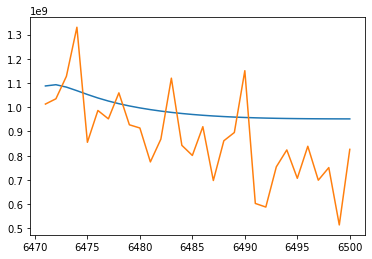

In [151]:
plt.plot(val.index,prediction)
plt.plot(val.total_value)
plt.show()

In [31]:
def final_model_prediction_on_val(train_,vald):
    scaler_,input_data = process_the_data(train_,var = "total_value")
    train_window = 52
    train_input_seq = create_inout_sequences(input_data, train_window)
    model = LSTM()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    epochs = 150

    for i in range(epochs):
        for seq, labels in train_input_seq:
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

            y_pred = model(seq)

            single_loss = loss_function(y_pred, labels)
            single_loss.backward()
            optimizer.step()

        if i%25 == 1:
            print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')
    fut_pred = 30

    test_inputs = input_data[-train_window:].tolist()
    for i in range(fut_pred):
        seq = torch.FloatTensor(test_inputs[-train_window:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
            test_inputs.append(model(seq).item())
    #prediction = 
    prediction = scaler_.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
    #RMSE = np.sqrt(sum(np.square(vald["total_value"] - prediction[:,0]))/len(vald))
    rms = np.sqrt(mean_squared_error(vald.total_value,prediction))
    #x = np.arange(8055,8085)
    plt.plot(pd.to_datetime(vald.period_begin),prediction)
    plt.plot(pd.to_datetime(vald.period_begin),vald.total_value)
    plt.title("Total Values GA")
    plt.show()
    return rms

epoch:   1 loss: 0.34755349
epoch:  26 loss: 0.13081512
epoch:  51 loss: 0.03114624
epoch:  76 loss: 0.00015906
epoch: 101 loss: 0.00007511
epoch: 126 loss: 0.00000531
epoch: 149 loss: 0.0000000413


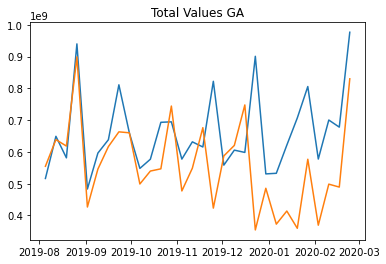

177717514.3458369

In [32]:
#train,val,test = create_each_state("TX")
#final_model_prediction_on_val(train,val)
train,val,test = create_each_state("GA")
final_model_prediction_on_val(train,val)
#train,val,test = create_each_state("NY")
#final_model_prediction_on_val(train,val)

epoch:   1 loss: 0.80338031
epoch:  26 loss: 0.52714741
epoch:  51 loss: 0.29417598
epoch:  76 loss: 0.00559471
epoch: 101 loss: 0.00079605
epoch: 126 loss: 0.04549648
epoch: 149 loss: 0.0170097891


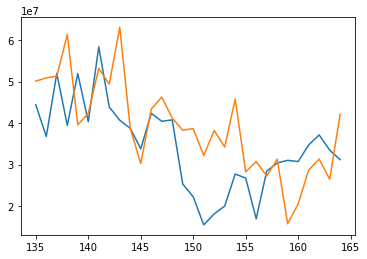

epoch:   1 loss: 0.75728661
epoch:  26 loss: 0.76986349
epoch:  51 loss: 0.39454380
epoch:  76 loss: 0.12850346
epoch: 101 loss: 0.01101981
epoch: 126 loss: 0.01021765
epoch: 149 loss: 0.0000023221


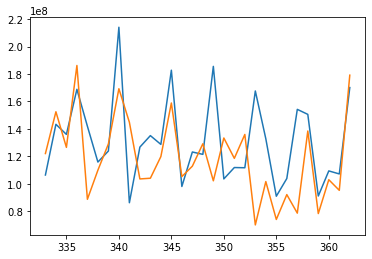

epoch:   1 loss: 0.60329199
epoch:  26 loss: 0.44017950
epoch:  51 loss: 0.39343220
epoch:  76 loss: 0.03754829
epoch: 101 loss: 0.03675853
epoch: 126 loss: 0.06819403
epoch: 149 loss: 0.0003876318


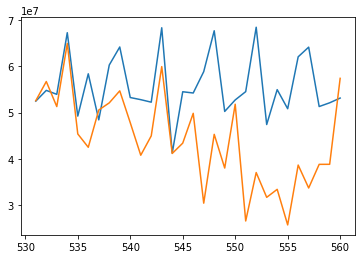

epoch:   1 loss: 0.42925158
epoch:  26 loss: 0.06316365
epoch:  51 loss: 0.12951744
epoch:  76 loss: 0.00765993
epoch: 101 loss: 0.02459408
epoch: 126 loss: 0.00030577
epoch: 149 loss: 0.0004500291


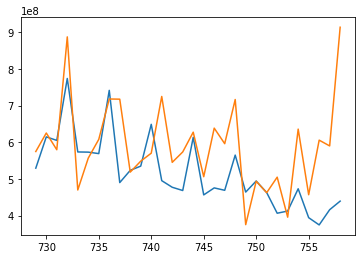

epoch:   1 loss: 0.15844841
epoch:  26 loss: 0.05792905
epoch:  51 loss: 0.00382734
epoch:  76 loss: 0.01213653
epoch: 101 loss: 0.00070389
epoch: 126 loss: 0.00067878
epoch: 149 loss: 0.0011800152


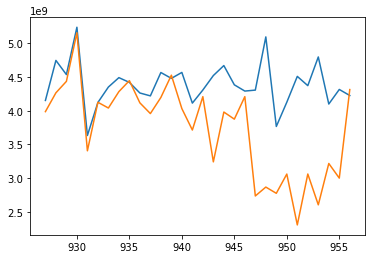

epoch:   1 loss: 0.32654643
epoch:  26 loss: 0.27153426
epoch:  51 loss: 0.02537685
epoch:  76 loss: 0.00190680
epoch: 101 loss: 0.00049104
epoch: 126 loss: 0.00071083
epoch: 149 loss: 0.0018600718


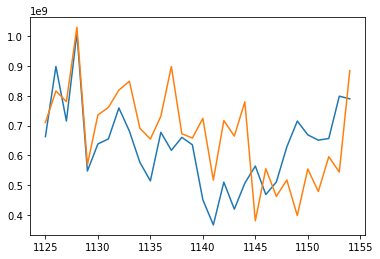

epoch:   1 loss: 0.52221954
epoch:  26 loss: 0.23239444
epoch:  51 loss: 0.08928275
epoch:  76 loss: 0.00293377
epoch: 101 loss: 0.00009666
epoch: 126 loss: 0.00009875
epoch: 149 loss: 0.0000041291


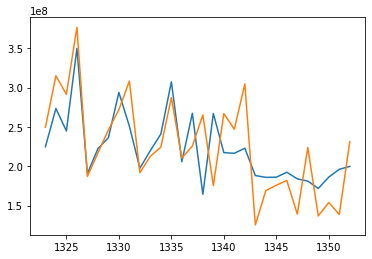

epoch:   1 loss: 0.28767410
epoch:  26 loss: 0.11481645
epoch:  51 loss: 0.01566376
epoch:  76 loss: 0.07743914
epoch: 101 loss: 0.26300287
epoch: 126 loss: 0.01828723
epoch: 149 loss: 0.0162891261


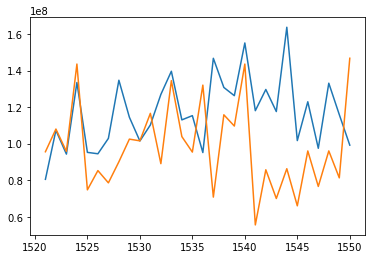

epoch:   1 loss: 0.52351940
epoch:  26 loss: 0.22003962
epoch:  51 loss: 0.02748696
epoch:  76 loss: 0.00484529
epoch: 101 loss: 0.02314244
epoch: 126 loss: 0.00728024
epoch: 149 loss: 0.0009178601


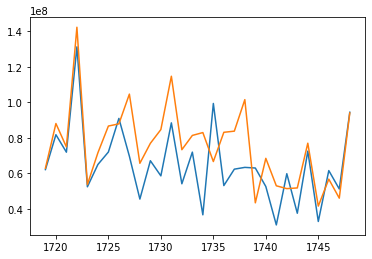

epoch:   1 loss: 0.51747048
epoch:  26 loss: 0.00004002
epoch:  51 loss: 0.00009653
epoch:  76 loss: 0.00071232
epoch: 101 loss: 0.00187072
epoch: 126 loss: 0.00045137
epoch: 149 loss: 0.0052358201


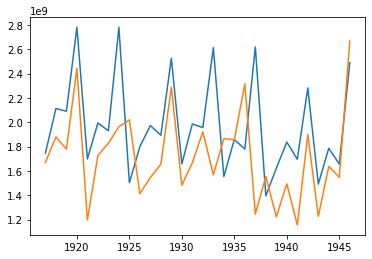

epoch:   1 loss: 0.33153185
epoch:  26 loss: 0.08230088
epoch:  51 loss: 0.09999155
epoch:  76 loss: 0.03618133
epoch: 101 loss: 0.02497764
epoch: 126 loss: 0.00984449
epoch: 149 loss: 0.0083006071


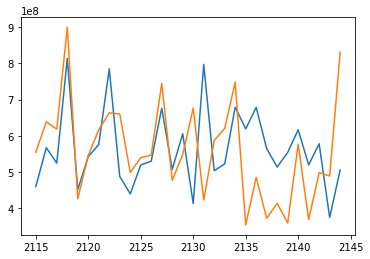

epoch:   1 loss: 0.08265870
epoch:  26 loss: 0.09823012
epoch:  51 loss: 0.13385756
epoch:  76 loss: 0.09346720
epoch: 101 loss: 0.03625361
epoch: 126 loss: 0.03863059
epoch: 149 loss: 0.0091071567


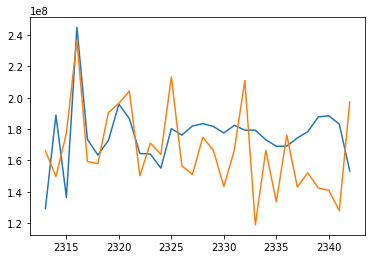

epoch:   1 loss: 0.34509864
epoch:  26 loss: 0.42250571
epoch:  51 loss: 0.30857295
epoch:  76 loss: 0.04485297
epoch: 101 loss: 0.00733963
epoch: 126 loss: 0.00034115
epoch: 149 loss: 0.0049583758


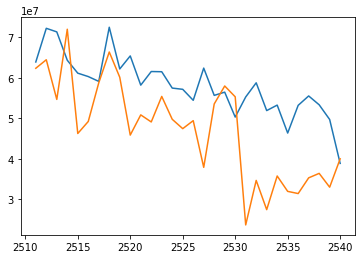

epoch:   1 loss: 0.39809397
epoch:  26 loss: 0.15789023
epoch:  51 loss: 0.01406725
epoch:  76 loss: 0.01865922
epoch: 101 loss: 0.01648599
epoch: 126 loss: 0.00227429
epoch: 149 loss: 0.0001984895


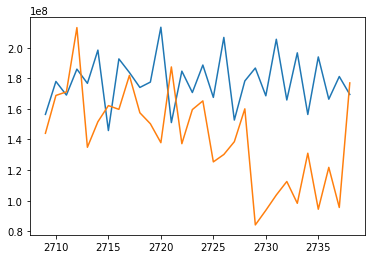

epoch:   1 loss: 0.36703211
epoch:  26 loss: 0.19920327
epoch:  51 loss: 0.32052454
epoch:  76 loss: 0.09813714
epoch: 101 loss: 0.01855796
epoch: 126 loss: 0.03793761
epoch: 149 loss: 0.0050111217


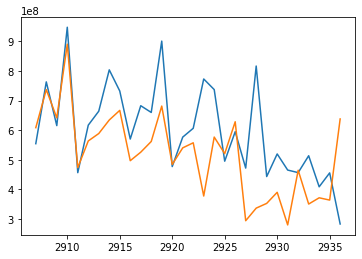

epoch:   1 loss: 0.49156377
epoch:  26 loss: 0.33283618
epoch:  51 loss: 0.16619492
epoch:  76 loss: 0.08442673
epoch: 101 loss: 0.00763662
epoch: 126 loss: 0.00000021
epoch: 149 loss: 0.0000550299


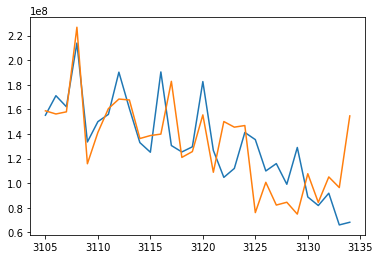

epoch:   1 loss: 0.24741697
epoch:  26 loss: 0.00000369
epoch:  51 loss: 0.01332058
epoch:  76 loss: 0.00404907
epoch: 101 loss: 0.00602359
epoch: 126 loss: 0.05518774
epoch: 149 loss: 0.0031817232


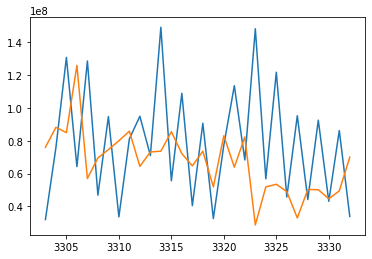

epoch:   1 loss: 0.63927418
epoch:  26 loss: 0.03602238
epoch:  51 loss: 0.06138540
epoch:  76 loss: 0.03033002
epoch: 101 loss: 0.00758165
epoch: 126 loss: 0.00020705
epoch: 149 loss: 0.0018075843


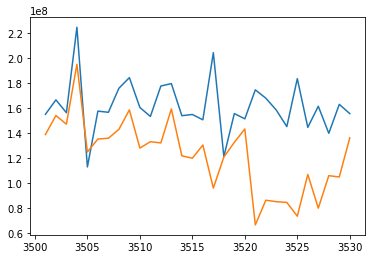

epoch:   1 loss: 0.50189728
epoch:  26 loss: 0.01145348
epoch:  51 loss: 0.10594940
epoch:  76 loss: 0.00004327
epoch: 101 loss: 0.03555081
epoch: 126 loss: 0.00116532
epoch: 149 loss: 0.0006117393


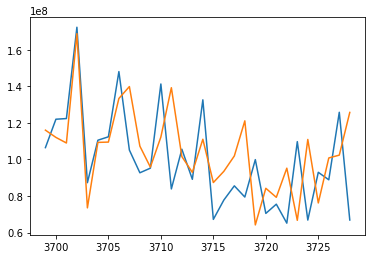

epoch:   1 loss: 0.78157175
epoch:  26 loss: 0.25197202
epoch:  51 loss: 0.18638051
epoch:  76 loss: 0.07961370
epoch: 101 loss: 0.09076170
epoch: 126 loss: 0.03329679
epoch: 149 loss: 0.0001940771


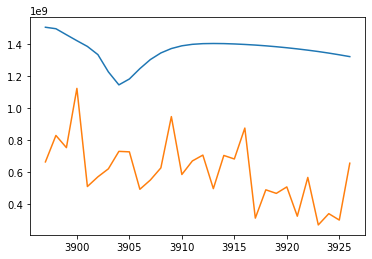

epoch:   1 loss: 0.52216280
epoch:  26 loss: 0.10339060
epoch:  51 loss: 0.08325289
epoch:  76 loss: 0.36287522
epoch: 101 loss: 0.12318561
epoch: 126 loss: 0.07854463
epoch: 149 loss: 0.0489556491


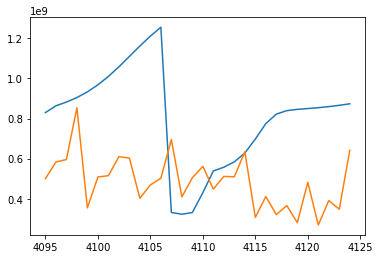

epoch:   1 loss: 0.42291439
epoch:  26 loss: 0.15333995
epoch:  51 loss: 0.01006994
epoch:  76 loss: 0.00022883
epoch: 101 loss: 0.00150010
epoch: 126 loss: 0.00127040
epoch: 149 loss: 0.0068957107


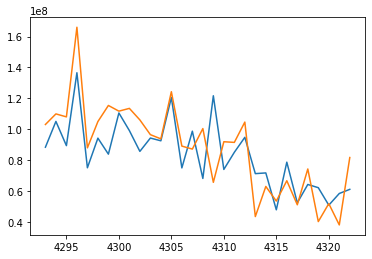

epoch:   1 loss: 0.11134078
epoch:  26 loss: 0.12206309
epoch:  51 loss: 0.05670002
epoch:  76 loss: 0.02296980
epoch: 101 loss: 0.04482752
epoch: 126 loss: 0.00800083
epoch: 149 loss: 0.0127856163


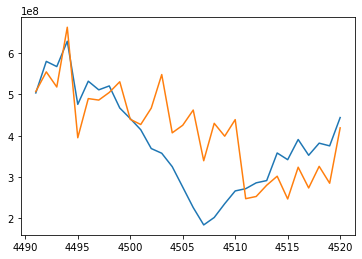

epoch:   1 loss: 0.67238218
epoch:  26 loss: 0.37017137
epoch:  51 loss: 0.13704072
epoch:  76 loss: 0.02425947
epoch: 101 loss: 0.01153502
epoch: 126 loss: 0.01796634
epoch: 149 loss: 0.0024171046


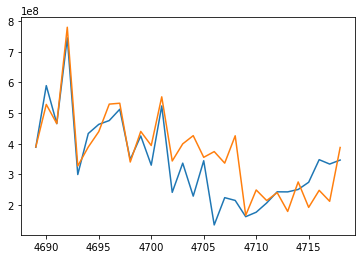

epoch:   1 loss: 0.51821750
epoch:  26 loss: 0.68111777
epoch:  51 loss: 0.07175732
epoch:  76 loss: 0.40770954
epoch: 101 loss: 0.31241244
epoch: 126 loss: 0.25022572
epoch: 149 loss: 0.1900717765


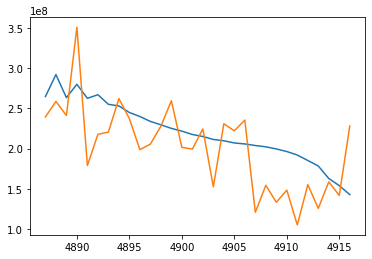

epoch:   1 loss: 0.16356085
epoch:  26 loss: 0.07425882
epoch:  51 loss: 0.13243558
epoch:  76 loss: 0.01125988
epoch: 101 loss: 0.21347424
epoch: 126 loss: 0.08360367
epoch: 149 loss: 0.0223345645


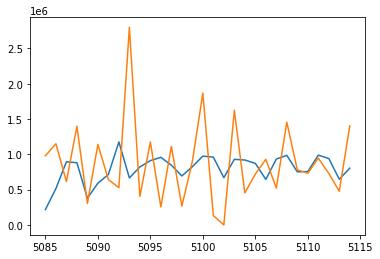

epoch:   1 loss: 0.42156252
epoch:  26 loss: 0.10268985
epoch:  51 loss: 0.01086054
epoch:  76 loss: 0.02318518
epoch: 101 loss: 0.00304045
epoch: 126 loss: 0.00236850
epoch: 149 loss: 0.0198106021


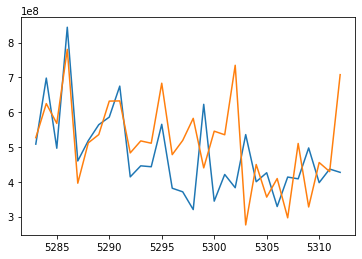

epoch:   1 loss: 0.59023559
epoch:  26 loss: 0.26857725
epoch:  51 loss: 0.09437947
epoch:  76 loss: 0.05064687
epoch: 101 loss: 0.00063966
epoch: 126 loss: 0.00192913
epoch: 149 loss: 0.0021772452


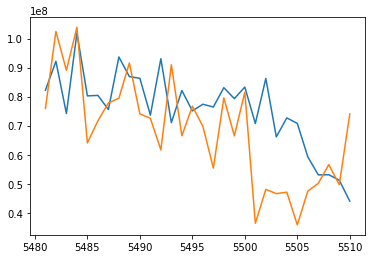

epoch:   1 loss: 0.47001636
epoch:  26 loss: 0.33651829
epoch:  51 loss: 0.12926622
epoch:  76 loss: 0.14573677
epoch: 101 loss: 0.22016594
epoch: 126 loss: 0.22558555
epoch: 149 loss: 0.0001978610


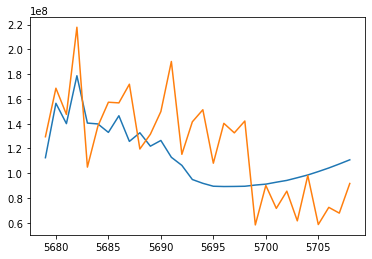

epoch:   1 loss: 0.47790349
epoch:  26 loss: 0.25530121
epoch:  51 loss: 0.00009818
epoch:  76 loss: 0.00529419
epoch: 101 loss: 0.00277143
epoch: 126 loss: 0.00330035
epoch: 149 loss: 0.0022448730


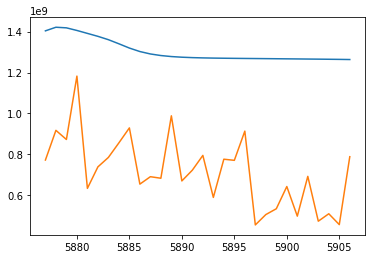

epoch:   1 loss: 0.75727654
epoch:  26 loss: 0.30617732
epoch:  51 loss: 0.01245711
epoch:  76 loss: 0.00090790
epoch: 101 loss: 0.01728518
epoch: 126 loss: 0.00328458
epoch: 149 loss: 0.0039696265


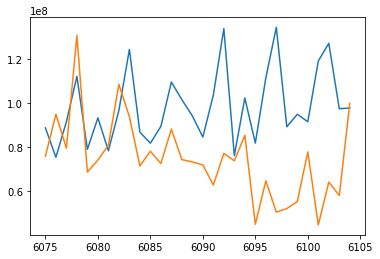

epoch:   1 loss: 0.41812450
epoch:  26 loss: 0.19985214
epoch:  51 loss: 0.06953371
epoch:  76 loss: 0.01105198
epoch: 101 loss: 0.04560761
epoch: 126 loss: 0.07041876
epoch: 149 loss: 0.0114542674


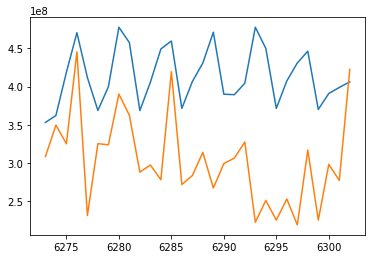

epoch:   1 loss: 0.53952134
epoch:  26 loss: 0.11025012
epoch:  51 loss: 0.06283396
epoch:  76 loss: 0.07834752
epoch: 101 loss: 0.21405406
epoch: 126 loss: 0.06173829
epoch: 149 loss: 0.0352798626


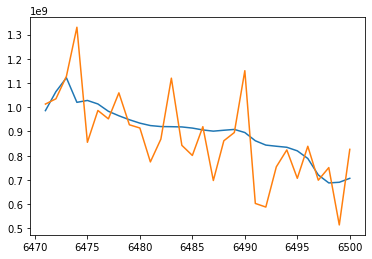

epoch:   1 loss: 0.42673793
epoch:  26 loss: 0.07988467
epoch:  51 loss: 0.00172921
epoch:  76 loss: 0.00201809
epoch: 101 loss: 0.00238298
epoch: 126 loss: 0.00138105
epoch: 149 loss: 0.0045206402


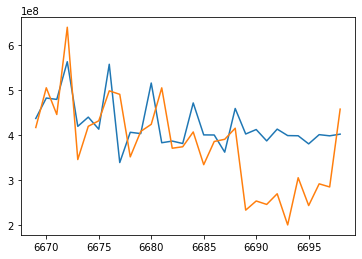

epoch:   1 loss: 0.47644281
epoch:  26 loss: 0.30393502
epoch:  51 loss: 0.15795402
epoch:  76 loss: 0.01455136
epoch: 101 loss: 0.00064716
epoch: 126 loss: 0.00013480
epoch: 149 loss: 0.0001021836


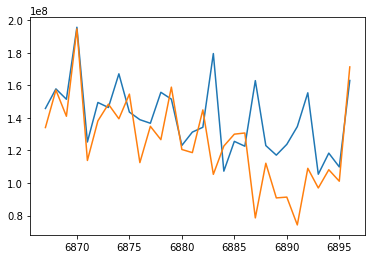

epoch:   1 loss: 0.57933134
epoch:  26 loss: 0.28898779
epoch:  51 loss: 0.04114292
epoch:  76 loss: 0.05922617
epoch: 101 loss: 0.16059095
epoch: 126 loss: 0.04976404
epoch: 149 loss: 0.3812478185


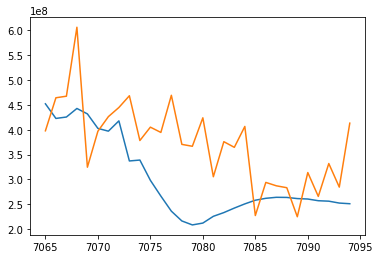

epoch:   1 loss: 0.43406534
epoch:  26 loss: 0.15134680
epoch:  51 loss: 0.04891110
epoch:  76 loss: 0.00070569
epoch: 101 loss: 0.01792822
epoch: 126 loss: 0.00129511
epoch: 149 loss: 0.0131911421


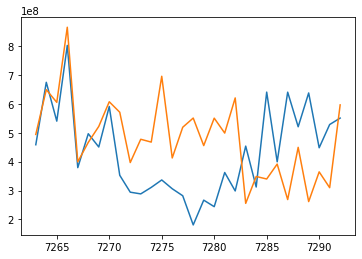

epoch:   1 loss: 0.57310021
epoch:  26 loss: 0.17996831
epoch:  51 loss: 0.11908419
epoch:  76 loss: 0.02032596
epoch: 101 loss: 0.00000051
epoch: 126 loss: 0.00047899
epoch: 149 loss: 0.0015255902


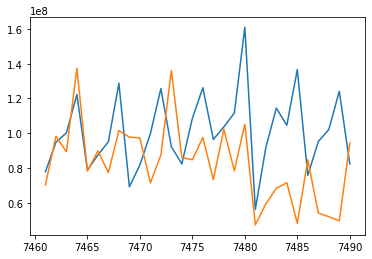

epoch:   1 loss: 0.44865590
epoch:  26 loss: 0.19151941
epoch:  51 loss: 0.00110240
epoch:  76 loss: 0.00193431
epoch: 101 loss: 0.00239992
epoch: 126 loss: 0.00240395
epoch: 149 loss: 0.0018507879


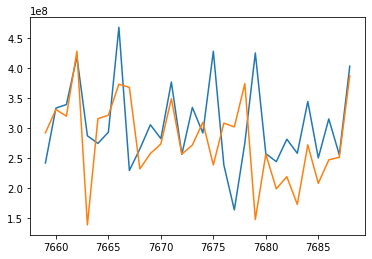

epoch:   1 loss: 0.64016932
epoch:  26 loss: 0.29493833
epoch:  51 loss: 0.19057932
epoch:  76 loss: 0.00298173
epoch: 101 loss: 0.00059916
epoch: 126 loss: 0.00523867
epoch: 149 loss: 0.0000364317


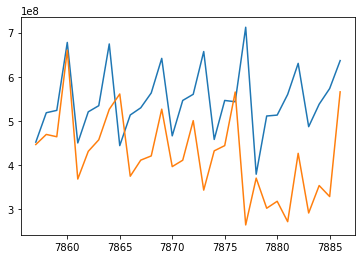

epoch:   1 loss: 0.54708189
epoch:  26 loss: 0.23266956
epoch:  51 loss: 0.06004152
epoch:  76 loss: 0.00035322
epoch: 101 loss: 0.01644504
epoch: 126 loss: 0.00000060
epoch: 149 loss: 0.0971505642


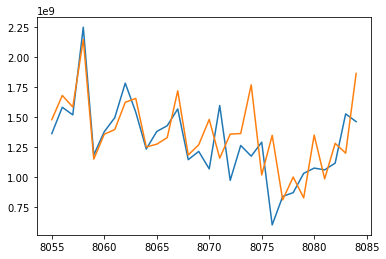

epoch:   1 loss: 0.16245027
epoch:  26 loss: 0.24699822
epoch:  51 loss: 0.20868132
epoch:  76 loss: 0.06665099
epoch: 101 loss: 0.00033262
epoch: 126 loss: 0.00008612
epoch: 149 loss: 0.0000398385


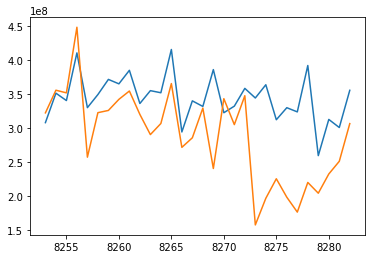

epoch:   1 loss: 0.23411435
epoch:  26 loss: 0.07454681
epoch:  51 loss: 0.00773495
epoch:  76 loss: 0.04015582
epoch: 101 loss: 0.00275888
epoch: 126 loss: 0.00006781
epoch: 149 loss: 0.0042779637


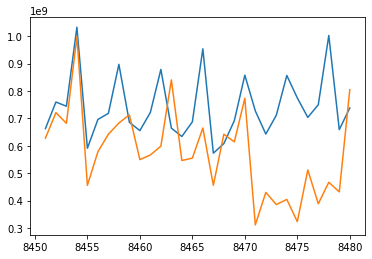

epoch:   1 loss: 0.37972945
epoch:  26 loss: 0.07012918
epoch:  51 loss: 0.07459347
epoch:  76 loss: 0.47698161
epoch: 101 loss: 0.30134696
epoch: 126 loss: 0.11109920
epoch: 149 loss: 0.1198535636


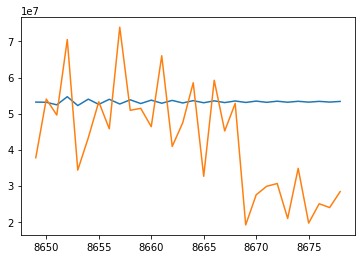

epoch:   1 loss: 0.19345951
epoch:  26 loss: 0.01407156
epoch:  51 loss: 0.00776456
epoch:  76 loss: 0.01217788
epoch: 101 loss: 0.00058825
epoch: 126 loss: 0.00285038
epoch: 149 loss: 0.0000072144


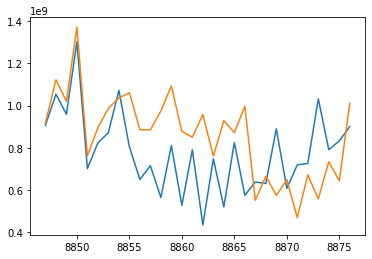

epoch:   1 loss: 0.78546160
epoch:  26 loss: 0.18878385
epoch:  51 loss: 0.00494655
epoch:  76 loss: 0.00105867
epoch: 101 loss: 0.00041151
epoch: 126 loss: 0.02635615
epoch: 149 loss: 0.0009857033


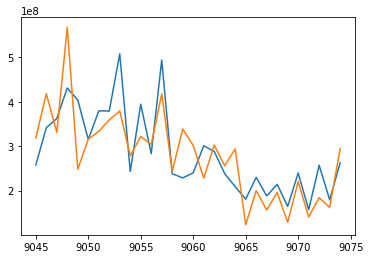

epoch:   1 loss: 1.06124377
epoch:  26 loss: 0.45525134
epoch:  51 loss: 1.07776225
epoch:  76 loss: 0.40910721
epoch: 101 loss: 0.01481569
epoch: 126 loss: 0.03023027
epoch: 149 loss: 0.1624109447


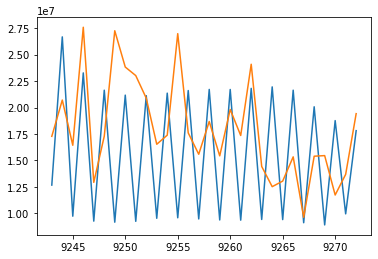

,state,rmse
0,AK,6.238810e+07
1,AL,1.924412e+08
2,AR,8.537366e+07
3,AZ,7.626101e+08
4,CA,5.198836e+09


In [34]:
state = []
rmse = []
for i in df.state.unique().tolist():
    train,val,test = create_each_state(i)
    rm = final_model_prediction_on_val(train,val)
    state.append(i)
    rmse.append(rm)

data = {'state': state, 'rmse': rmse}
df_lstm = pd.DataFrame(data=data)
df_lstm.head()
    

In [35]:
df_lstm

,state,rmse
0,AK,6.238810e+07
1,AL,1.924412e+08
2,AR,8.537366e+07
3,AZ,7.626101e+08
4,CA,5.198836e+09
5,CO,8.570318e+08
6,CT,2.346449e+08
7,DC,1.863717e+08
8,DE,1.074988e+08
9,FL,2.520580e+09


In [36]:
df.to_csv("lstm_prediction.csv")